### Inferential Statistics Challenge

In [3]:
import pandas as pd

df = pd.read_csv("../../DS-SF-32/dataset/police-killings.csv")

In [4]:
df.head()

,Unnamed: 0,name,age,gender,raceethnicity,month,day,year,streetaddress,city,state,lawenforcementagency,cause,armed,county_income
0,0,A'donte Washington,16,Male,Black,February,23,2015,Clearview Ln,Millbrook,AL,Millbrook Police Department,Gunshot,No,54766
1,1,Aaron Rutledge,27,Male,White,April,2,2015,300 block Iris Park Dr,Pineville,LA,Rapides Parish Sheriff's Office,Gunshot,No,40930
2,2,Aaron Siler,26,Male,White,March,14,2015,22nd Ave and 56th St,Kenosha,WI,Kenosha Police Department,Gunshot,No,54930
3,3,Aaron Valdez,25,Male,Hispanic/Latino,March,11,2015,3000 Seminole Ave,South Gate,CA,South Gate Police Department,Gunshot,Firearm,55909
4,4,Adam Jovicic,29,Male,White,March,19,2015,364 Hiwood Ave,Munroe Falls,OH,Kent Police Department,Gunshot,No,49669


### Challenge 1

+ Calculate The Standard Deviation For Age
+ Without using the standard deviation function


In [5]:
print df['age'].std()
age_data = df['age']

u = age_data.mean()

e = df['age'].copy()

e = (e-u)**2  

(e.sum()/(e.count()-1))**0.5



12.9446168284


12.944616828363477

### Challenge 2

+ Check to see if age is normally distributed

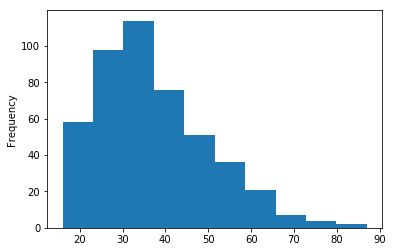

In [6]:
%matplotlib inline
df['age'].plot.hist()

### Challenge 3

+ Write your own code for a t-test, manually
+ Are white victims significantly older or younger than non-white victims?

In [7]:
wdf = df[df['raceethnicity']=='White']['age']

In [8]:
nwdf = df[df['raceethnicity']!='White']['age']

In [9]:
std_wdf = wdf.std()
print std_wdf


13.4440889192


In [10]:
std_nwdf = nwdf.std()
print std_nwdf

11.6059234472


In [11]:
# standard deviations seem close, so we used "pooled" combined standard error
w_cse_contribution = (std_wdf**2)/wdf.count()
print w_cse_contribution
nw_cse_contribution = (std_nwdf**2)/nwdf.count()
print nw_cse_contribution
combined_standard_error  = ( w_cse_contribution + nw_cse_contribution)**0.5
print combined_standard_error


0.765862401975
0.583105883388
1.16145093971


In [12]:
t = (wdf.mean() - nwdf.mean())/combined_standard_error
print t

5.42189972108


In [13]:
import statsmodels.stats.weightstats as sm

# t-test, p-value, degrees of freedom
print sm.ttest_ind(wdf, nwdf)

from scipy.stats import ttest_ind

print ttest_ind(wdf, nwdf)

(5.4134143501841292, 9.9263688861270249e-08, 465.0)
Ttest_indResult(statistic=5.4134143501841283, pvalue=9.9263688861270646e-08)


In [14]:
degrees_of_freedom = wdf.count() - 1 + nwdf.count() - 1
print degrees_of_freedom

465


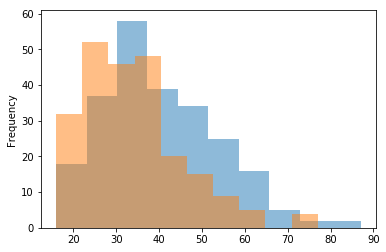

In [15]:
wdf.plot.hist(alpha=0.5, label='x')
nwdf.plot.hist(alpha=0.5, label='y')

In [18]:
wdf = wdf.apply(float)

In [19]:
nwdf =nwdf.apply(float)

In [21]:
print sm.ttest_ind(wdf, nwdf)
print ttest_ind(wdf, nwdf)

(5.4134143501841292, 9.9263688861270249e-08, 465.0)
Ttest_indResult(statistic=5.4134143501841283, pvalue=9.9263688861270646e-08)
